In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
data=pd.read_csv('/content/homeprices.csv')
data.head()


(6, 4)

In [4]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(data.drop('price',axis='columns'))
scaled_y = sy.fit_transform(data['price'].values.reshape(data.shape[0],1))

scaled_X



array([[0.        , 0.        , 0.54545455],
       [0.26666667, 0.33333333, 0.31818182],
       [0.4       , 0.        , 0.45454545],
       [0.66666667, 0.        , 1.        ],
       [0.93333333, 0.66666667, 0.        ],
       [1.        , 1.        , 0.        ]])

In [5]:
scaled_y

array([[0.        ],
       [0.05769231],
       [0.23076923],
       [0.17307692],
       [0.80769231],
       [1.        ]])

In [9]:
scaled_y.reshape(6,)

array([0.        , 0.05769231, 0.23076923, 0.17307692, 0.80769231,
       1.        ])

In [14]:
def batch_gradient_descent(x,y,epochs,learning_rate=0.01):
  number_features=x.shape[1]
  w=np.ones(shape=(number_features))
  b=0
  total_samples=x.shape[0]
  loss_list=[]
  epochs_list=[]
  for i in range(epochs):
    y_predicted=np.dot(w,x.T)+b
    w_grad=-(2/total_samples)*(x.T.dot(y-y_predicted))
    b_grad=-(2/total_samples)*(np.sum(y-y_predicted))
    w=w-learning_rate*w_grad
    b=b-learning_rate*b_grad
    loss=np.mean(np.square(y-y_predicted))
    if i%10==0:
      loss_list.append(loss)
      epochs_list.append(i)
  return w,b,loss,loss_list,epochs_list


In [17]:
w,b,loss,loss_list,epochs_list=batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),100)
w,b,loss

(array([0.67388408, 0.85223094, 0.69662788]),
 np.float64(-0.5184730627131874),
 np.float64(0.046988575349620455))

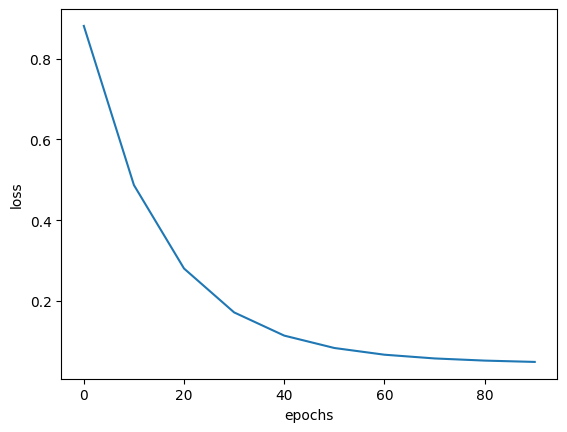

In [18]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs_list,loss_list)

In [23]:
def prediction(area,bedrooms,age,w,b):
  scaled_X=sx.transform([[area,bedrooms,age]])[0]
  scaled_price=w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
  return sy.inverse_transform([[scaled_price]])[0][0]


In [27]:
prediction(3000,4,15,w,b)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(535779.6482177315)